In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme('paper')
sns.set_style('whitegrid')

In [3]:
path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/movies_cast_2.csv'
cpi_path = '/content/drive/MyDrive/Year 4 (2022 - 2023)/Fall 2022/Computational Social Science/Project/New processed data/CPI - US.csv'

In [4]:
df = pd.read_csv(path)
df = df[['tconst', 'primaryTitle', 'startYear', 'budget', 'revenue']]
print(df.shape)
df.head()

(3540, 5)


,tconst,primaryTitle,startYear,budget,revenue
0,tt1179904,Paranormal Activity,2007,230000,194183034
1,tt2309260,The Gallows,2015,100000,42664410
2,tt0876294,Zombie Diaries,2006,9300,2000000
3,tt0907657,Once,2007,160000,20710513
4,tt0374900,Napoleon Dynamite,2004,400000,46118097


In [5]:
cpi = pd.read_csv(cpi_path)
cpi.head()

,Year,CPI
0,2000,78.97
1,2001,81.20
2,2002,82.49
3,2003,84.36
4,2004,86.62


In [6]:
cpi_dict = dict(zip(cpi.Year, cpi.CPI))
cpi_19 = cpi_dict[2019]
print(cpi_19)
cpi_dict

117.24


{2000: 78.97,
 2001: 81.2,
 2002: 82.49,
 2003: 84.36,
 2004: 86.62,
 2005: 89.56,
 2006: 92.45,
 2007: 95.09,
 2008: 98.74,
 2009: 98.39,
 2010: 100.0,
 2011: 103.16,
 2012: 105.29,
 2013: 106.83,
 2014: 108.57,
 2015: 108.7,
 2016: 110.07,
 2017: 112.41,
 2018: 115.16,
 2019: 117.24}

In [7]:
df['CPI ratio 2019'] = df.apply(lambda x: cpi_19 / cpi_dict[x.startYear], axis=1)

In [8]:
df['budget_adj'] = df['budget'] * df['CPI ratio 2019']
df['revenue_adj'] = df['revenue'] * df['CPI ratio 2019']

In [9]:
df.head(10)

,tconst,primaryTitle,startYear,budget,revenue,CPI ratio 2019,budget_adj,revenue_adj
0,tt1179904,Paranormal Activity,2007,230000,194183034,1.232937,2.835756e+05,2.394155e+08
1,tt2309260,The Gallows,2015,100000,42664410,1.078565,1.078565e+05,4.601633e+07
2,tt0876294,Zombie Diaries,2006,9300,2000000,1.268145,1.179375e+04,2.536290e+06
3,tt0907657,Once,2007,160000,20710513,1.232937,1.972700e+05,2.553476e+07
4,tt0374900,Napoleon Dynamite,2004,400000,46118097,1.353498,5.413992e+05,6.242075e+07
5,tt0444653,Keeping Mum,2005,169000,18564702,1.309067,2.212322e+05,2.430243e+07
6,tt0374102,Open Water,2003,500000,54667954,1.389758,6.948791e+05,7.597524e+07
7,tt0805526,Facing the Giants,2006,100000,10178331,1.268145,1.268145e+05,1.290760e+07
8,tt1560985,The Devil Inside,2012,1000000,101758490,1.113496,1.113496e+06,1.133077e+08
9,tt2235779,The Quiet Ones,2014,200000,17834867,1.079856,2.159713e+05,1.925909e+07


In [10]:
df.to_csv('budget_revenue_adj.csv', index=False)

In [11]:
avg = df.groupby('startYear')[['budget', 'revenue', 'budget_adj', 'revenue_adj']].mean()
avg.head()

,budget,revenue,budget_adj,revenue_adj
startYear,,,,
2000,3.563566e+07,8.029523e+07,5.290521e+07,1.192075e+08
2001,3.647263e+07,8.330553e+07,5.266073e+07,1.202801e+08
2002,3.545463e+07,9.087055e+07,5.039035e+07,1.291510e+08
2003,3.831921e+07,9.540401e+07,5.325444e+07,1.325885e+08
2004,3.757127e+07,8.524452e+07,5.085264e+07,1.153783e+08


In [12]:
years = np.arange(2000, 2020, 1)
year_labels = ["'" + str(y)[2:] for y in years]
year_labels_dict = dict(zip(years, year_labels))

In [13]:
budget_values = np.arange(10000000, 60000000, 10000000)
# budget_labels = [f'${value:,}' for value in budget_values]
budget_labels = [f'${str(int(value/1000000))}M' for value in budget_values]

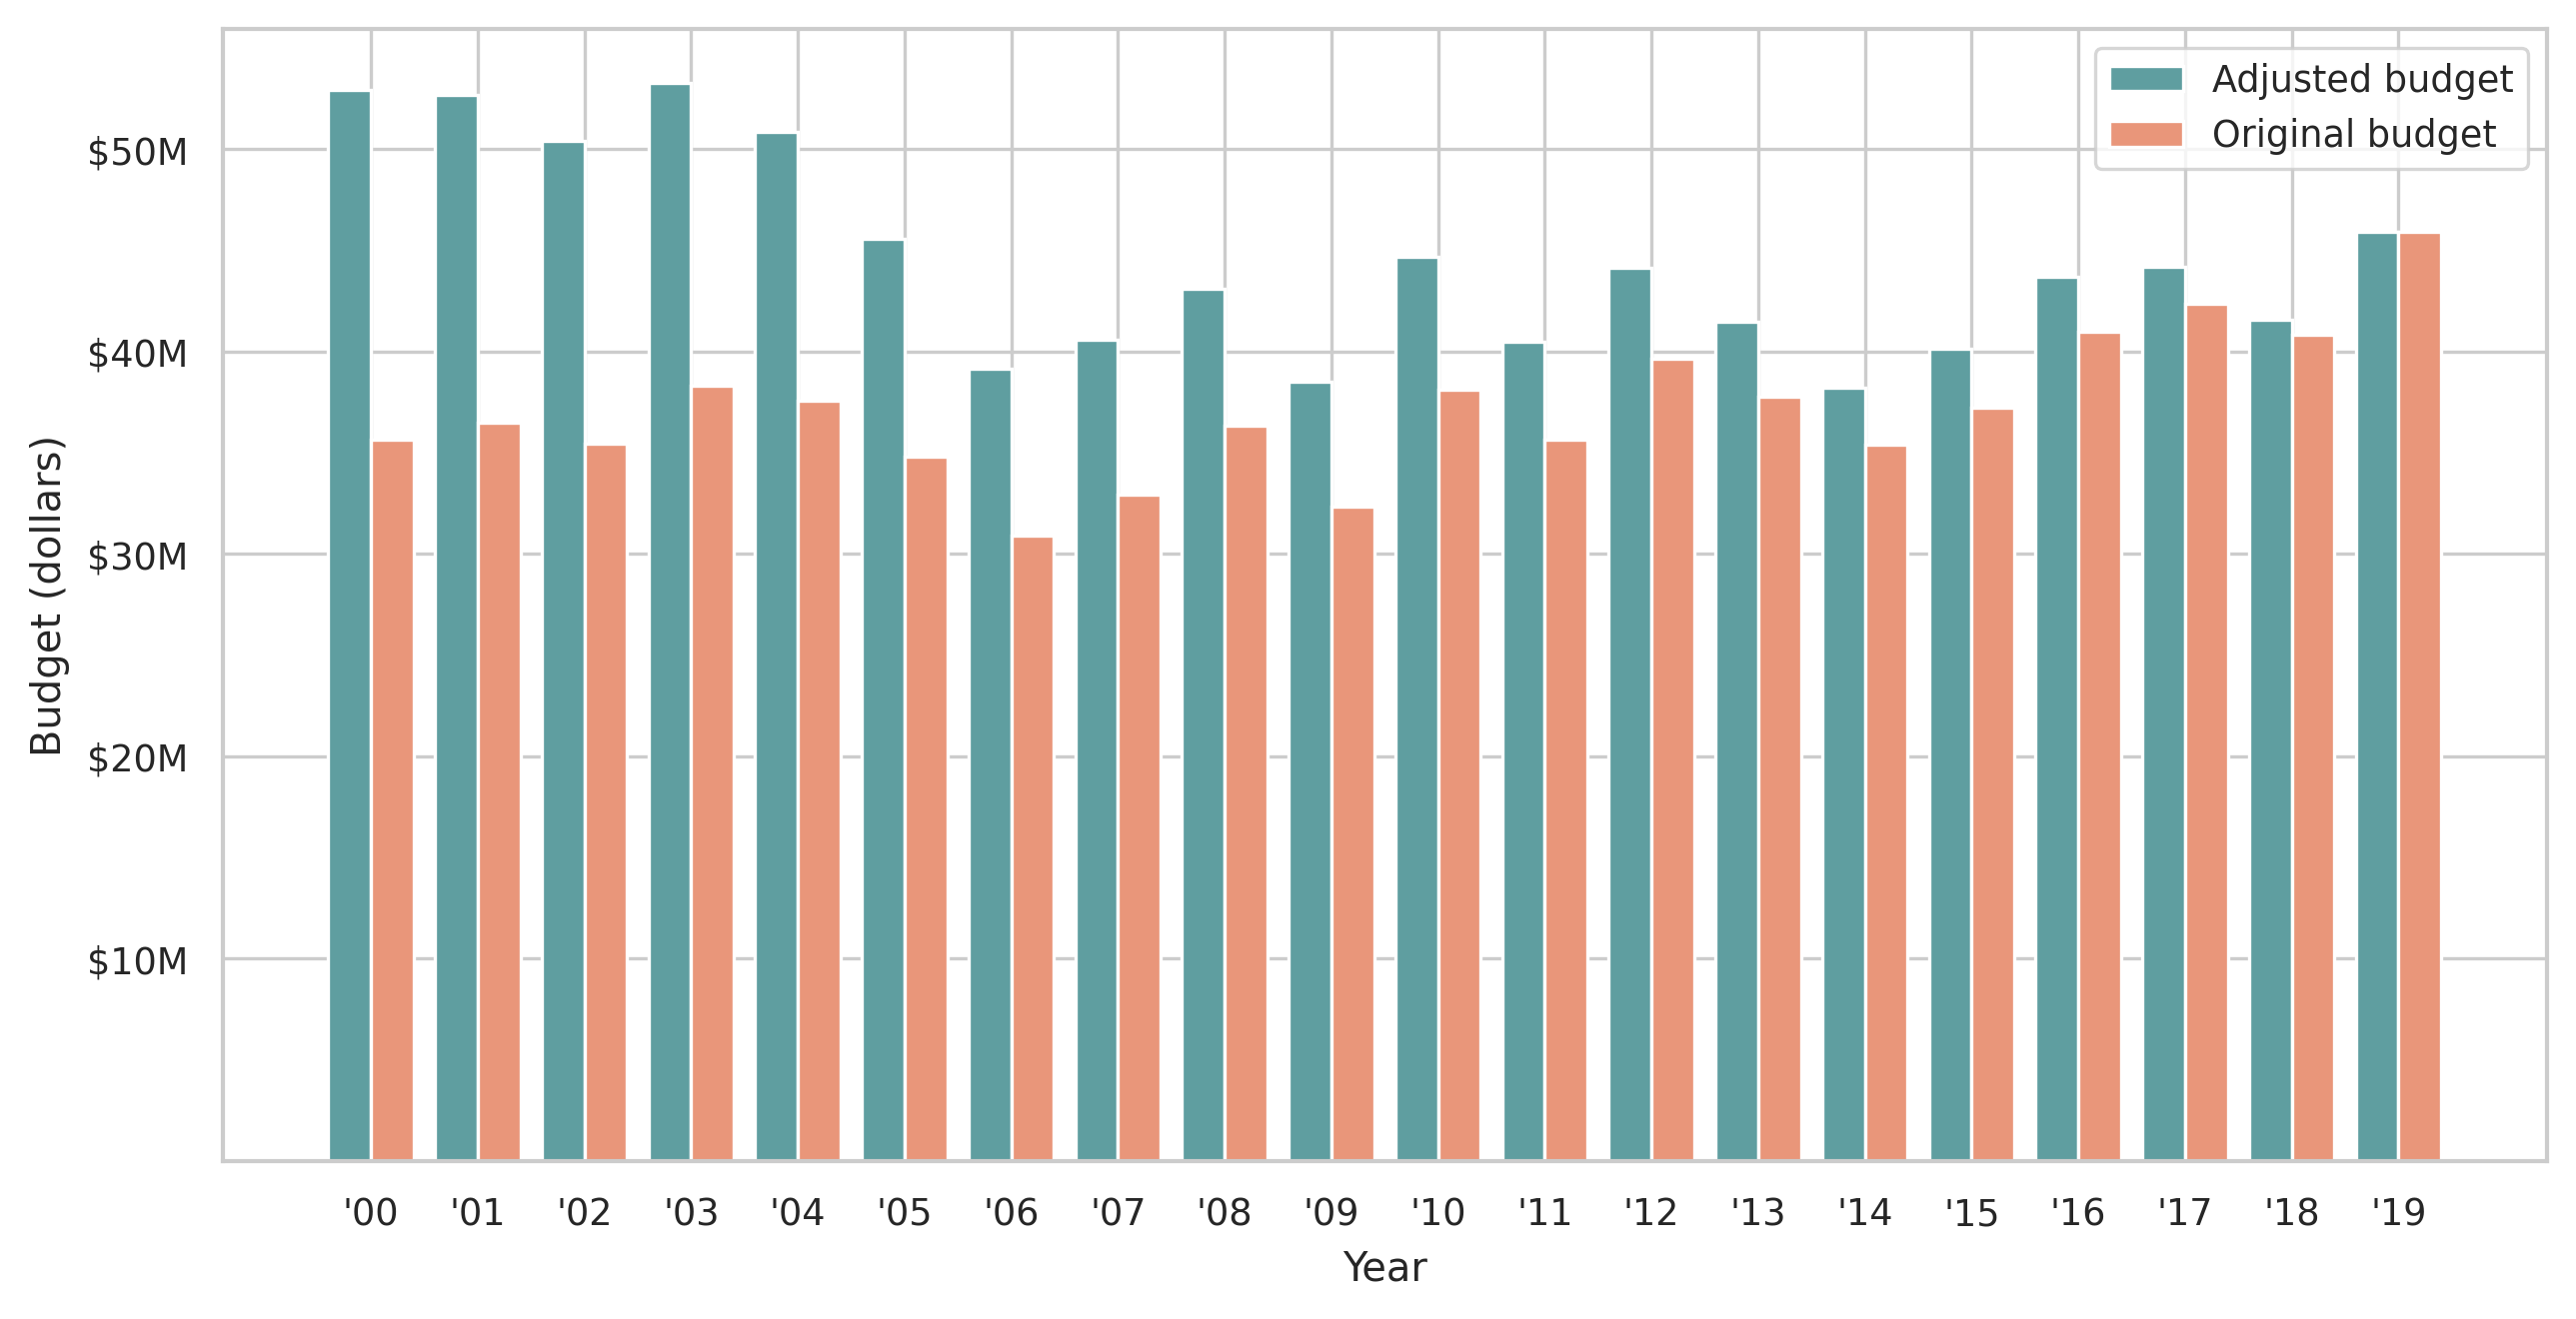

In [42]:
plt.figure(figsize=(10, 5), dpi=300)
plt.bar(avg.index, avg.budget_adj, color='cadetblue', width=-0.4, align='edge', label='Adjusted budget')
plt.bar(avg.index, avg.budget, color='darksalmon', width=0.4, align='edge', label='Original budget')
# plt.plot(avg.index, avg.revenue_adj, color='lightsalmon', label='Adjusted revenue')

plt.xticks(ticks=years, labels=year_labels)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
# plt.minorticks_on()
plt.yticks(ticks=budget_values, labels=budget_labels)

plt.xlabel('Year')
plt.ylabel('Budget (dollars)')

plt.legend()
plt.show()

In [15]:
revenue_values = np.arange(20000000, 170000000, 20000000)
# budget_labels = [f'${value:,}' for value in budget_values]
revenue_labels = [f'${str(int(value/1000000))}M' for value in revenue_values]

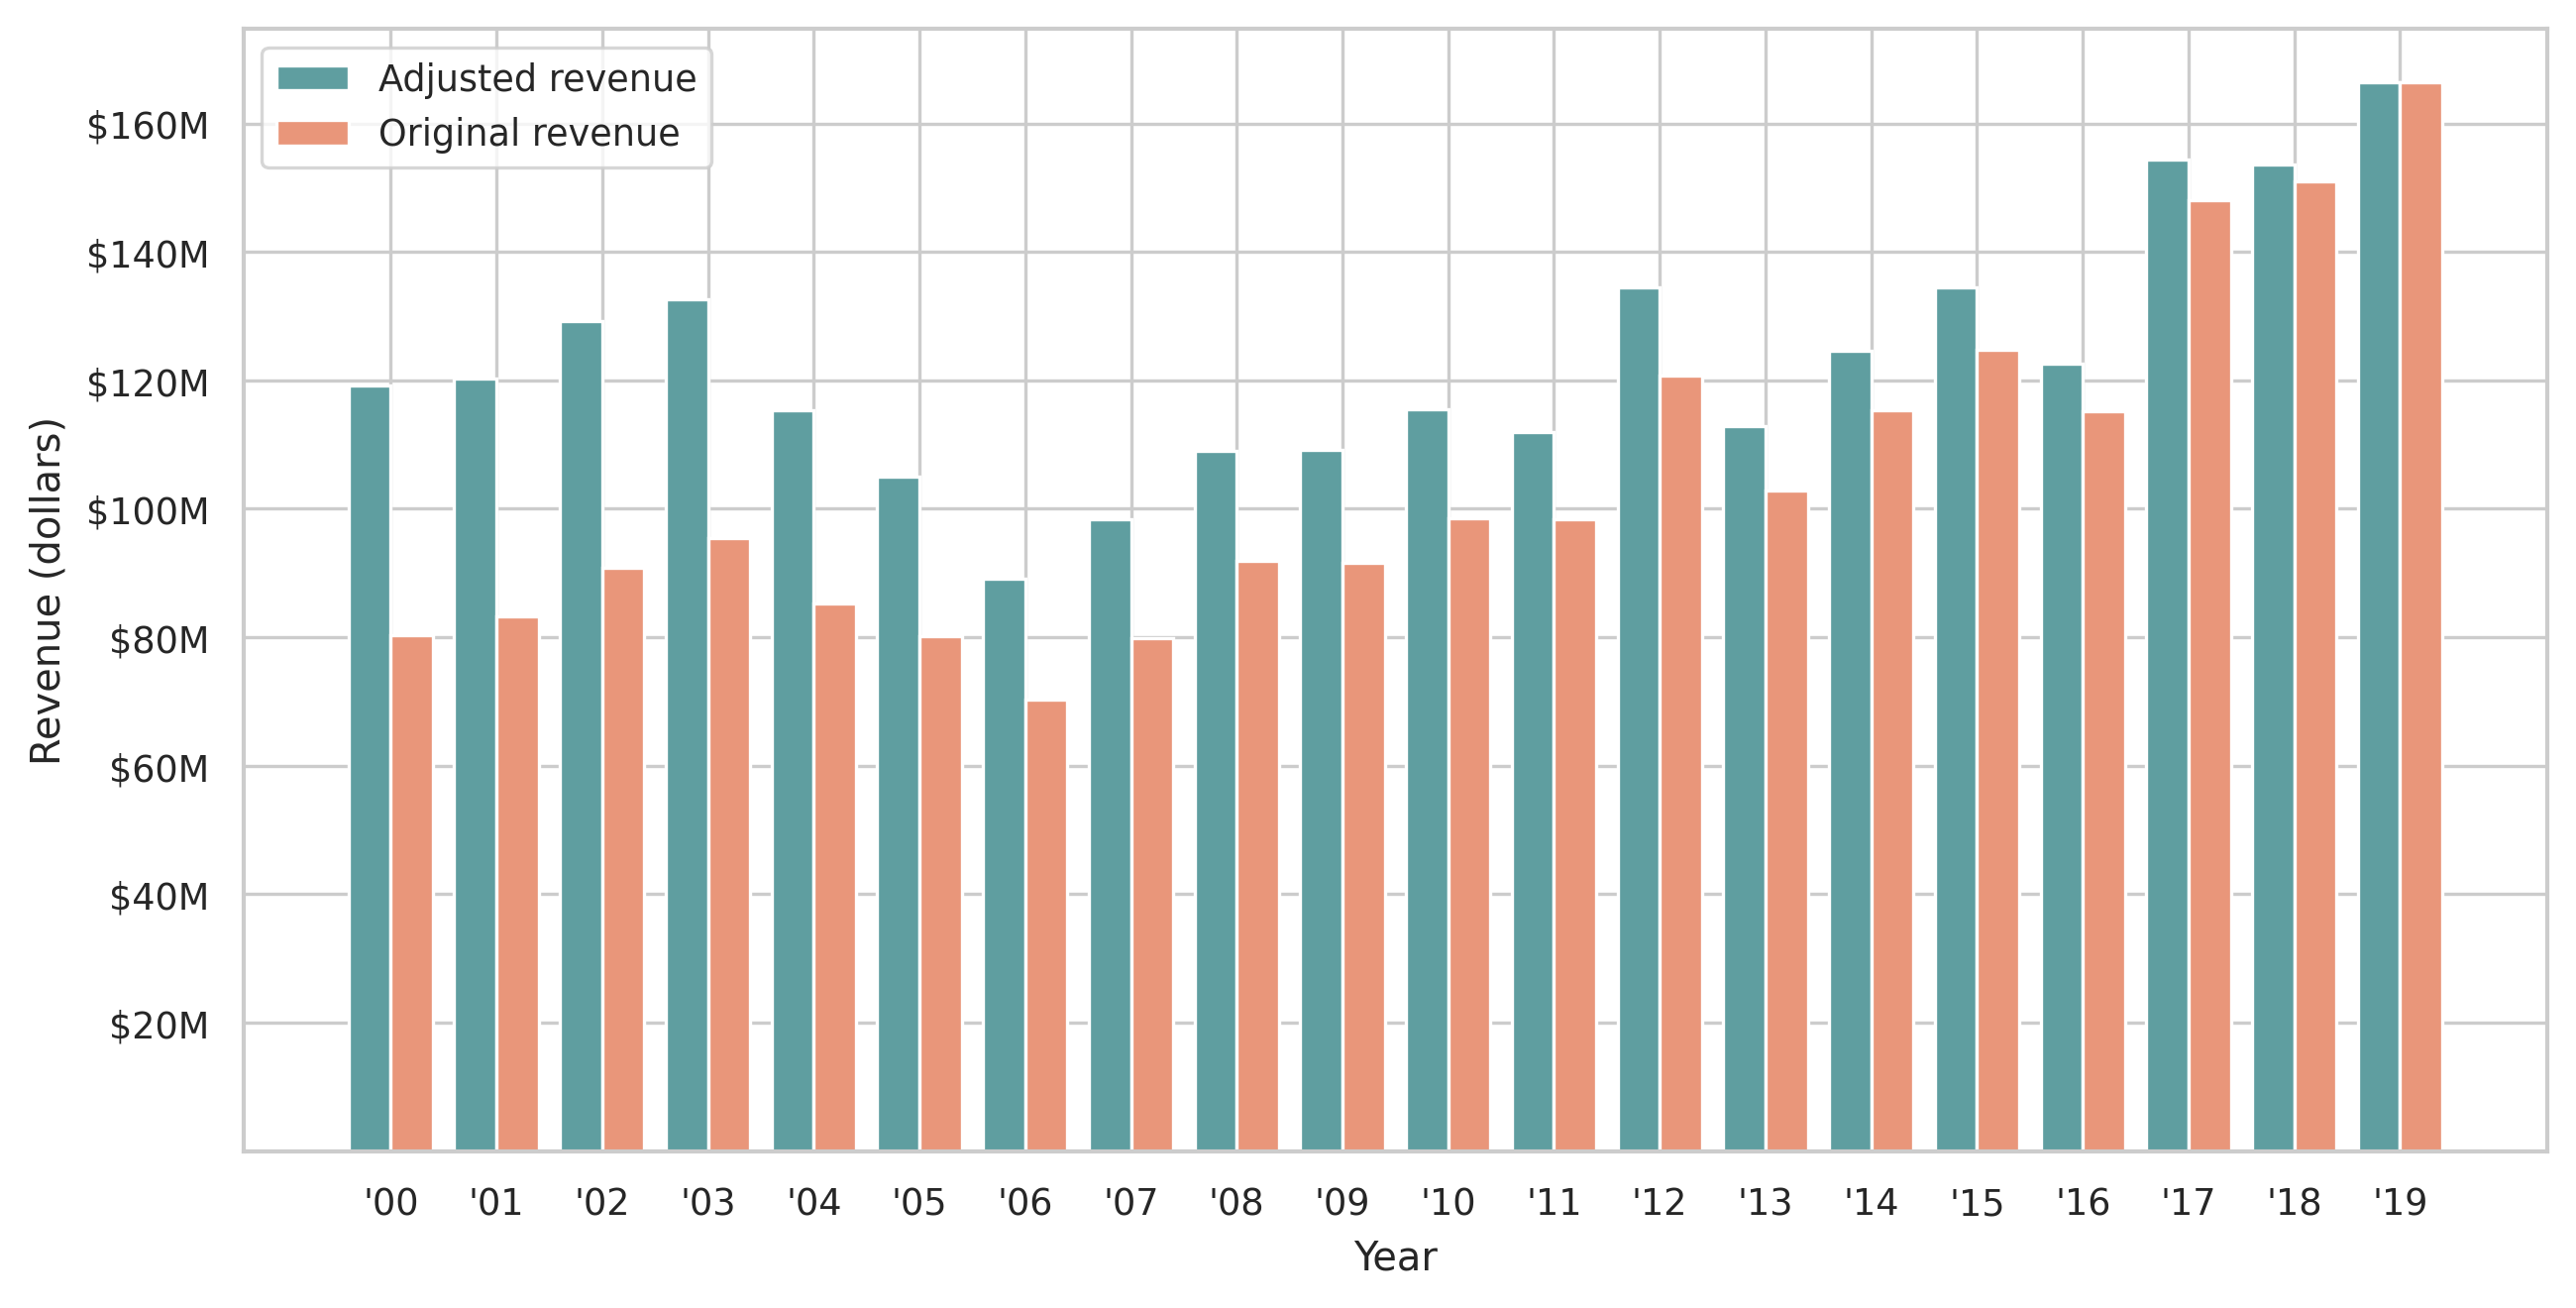

In [43]:
plt.figure(figsize=(10, 5), dpi=300)
plt.bar(avg.index, avg.revenue_adj, color='cadetblue', width=-0.4, align='edge', label='Adjusted revenue')
plt.bar(avg.index, avg.revenue, color='darksalmon', width=0.4, align='edge', label='Original revenue')
# plt.plot(avg.index, avg.revenue_adj, color='lightsalmon', label='Adjusted revenue')

plt.xticks(ticks=years, labels=year_labels)
plt.ticklabel_format(style='plain', useOffset=False, axis='y')
plt.yticks(ticks=revenue_values, labels=revenue_labels)

plt.xlabel('Year')
plt.ylabel('Revenue (dollars)')

plt.legend()
plt.show()

In [17]:
df[df.startYear <= 2003]

,tconst,primaryTitle,startYear,budget,revenue,CPI ratio 2019,budget_adj,revenue_adj
6,tt0374102,Open Water,2003,500000,54667954,1.389758,6.948791e+05,7.597524e+07
12,tt0308152,Dead End,2003,900000,77000000,1.389758,1.250782e+06,1.070114e+08
15,tt0259446,My Big Fat Greek Wedding,2002,5000000,368744044,1.421263,7.106316e+06,5.240823e+08
21,tt0242150,Xchange,2001,100000,5000000,1.443842,1.443842e+05,7.219212e+06
29,tt0303353,The Kid Stays in the Picture,2002,40000,1434436,1.421263,5.685053e+04,2.038711e+06
...,...,...,...,...,...,...,...,...
3515,tt0166158,Daddy and Them,2001,4000000,6718,1.443842,5.775369e+06,9.699733e+03
3517,tt0252223,All the Queen's Men,2001,15000000,23000,1.443842,2.165764e+07,3.320837e+04
3524,tt0204350,Poor White Trash,2000,1200000,1404,1.484614,1.781537e+06,2.084399e+03
3530,tt0300902,Absolon,2003,8000000,7016,1.389758,1.111807e+07,9.750543e+03


(array([2.403e+03, 6.060e+02, 2.510e+02, 1.290e+02, 9.100e+01, 3.300e+01,
        1.900e+01, 4.000e+00, 2.000e+00, 2.000e+00]),
 array([1.25013571e+03, 4.31876315e+07, 8.63740129e+07, 1.29560394e+08,
        1.72746776e+08, 2.15933157e+08, 2.59119538e+08, 3.02305920e+08,
        3.45492301e+08, 3.88678683e+08, 4.31865064e+08]),
 <a list of 10 Patch objects>)

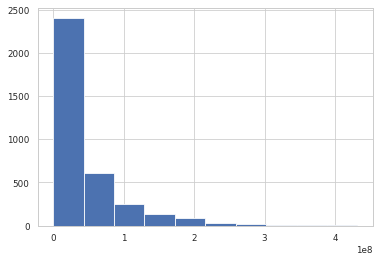

In [18]:
plt.hist(df.budget_adj)

In [19]:
np.quantile(df.budget_adj, [0.25, 0.5, 0.75])

array([10106896.55172414, 25407222.26991637, 55996168.36450669])

In [20]:
df[['budget', 'budget_adj']].describe()

,budget,budget_adj
count,3.540000e+03,3.540000e+03
mean,3.691484e+07,4.411495e+07
std,4.504456e+07,5.243708e+07
min,1.000000e+03,1.250136e+03
25%,8.500000e+06,1.010690e+07
50%,2.100000e+07,2.540722e+07
75%,4.500000e+07,5.599617e+07
max,3.800000e+08,4.318651e+08


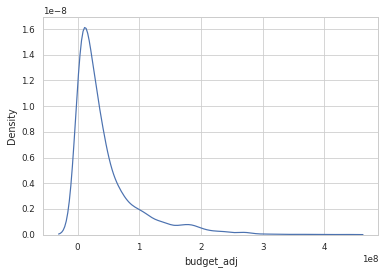

In [21]:
sns.kdeplot(df.budget_adj)

In [22]:
df['profit'] = df.revenue_adj - df.budget_adj

In [23]:
avg = df.groupby('startYear')[['budget', 'revenue', 'budget_adj', 'revenue_adj', 'profit']].mean()
avg

,budget,revenue,budget_adj,revenue_adj,profit
startYear,,,,,
2000,3.563566e+07,8.029523e+07,5.290521e+07,1.192075e+08,6.630225e+07
2001,3.647263e+07,8.330553e+07,5.266073e+07,1.202801e+08,6.761933e+07
2002,3.545463e+07,9.087055e+07,5.039035e+07,1.291510e+08,7.876061e+07
2003,3.831921e+07,9.540401e+07,5.325444e+07,1.325885e+08,7.933406e+07
2004,3.757127e+07,8.524452e+07,5.085264e+07,1.153783e+08,6.452565e+07
2005,3.481510e+07,8.019346e+07,4.557528e+07,1.049786e+08,5.940330e+07
2006,3.087935e+07,7.033336e+07,3.915949e+07,8.919290e+07,5.003341e+07
2007,3.291384e+07,7.980954e+07,4.058069e+07,9.840015e+07,5.781945e+07
2008,3.631237e+07,9.187285e+07,4.311589e+07,1.090862e+08,6.597033e+07


In [24]:
profit_values = np.arange(20000000, 130000000, 20000000)
profit_labels = [f'${str(int(value/1000000))}M' for value in profit_values]

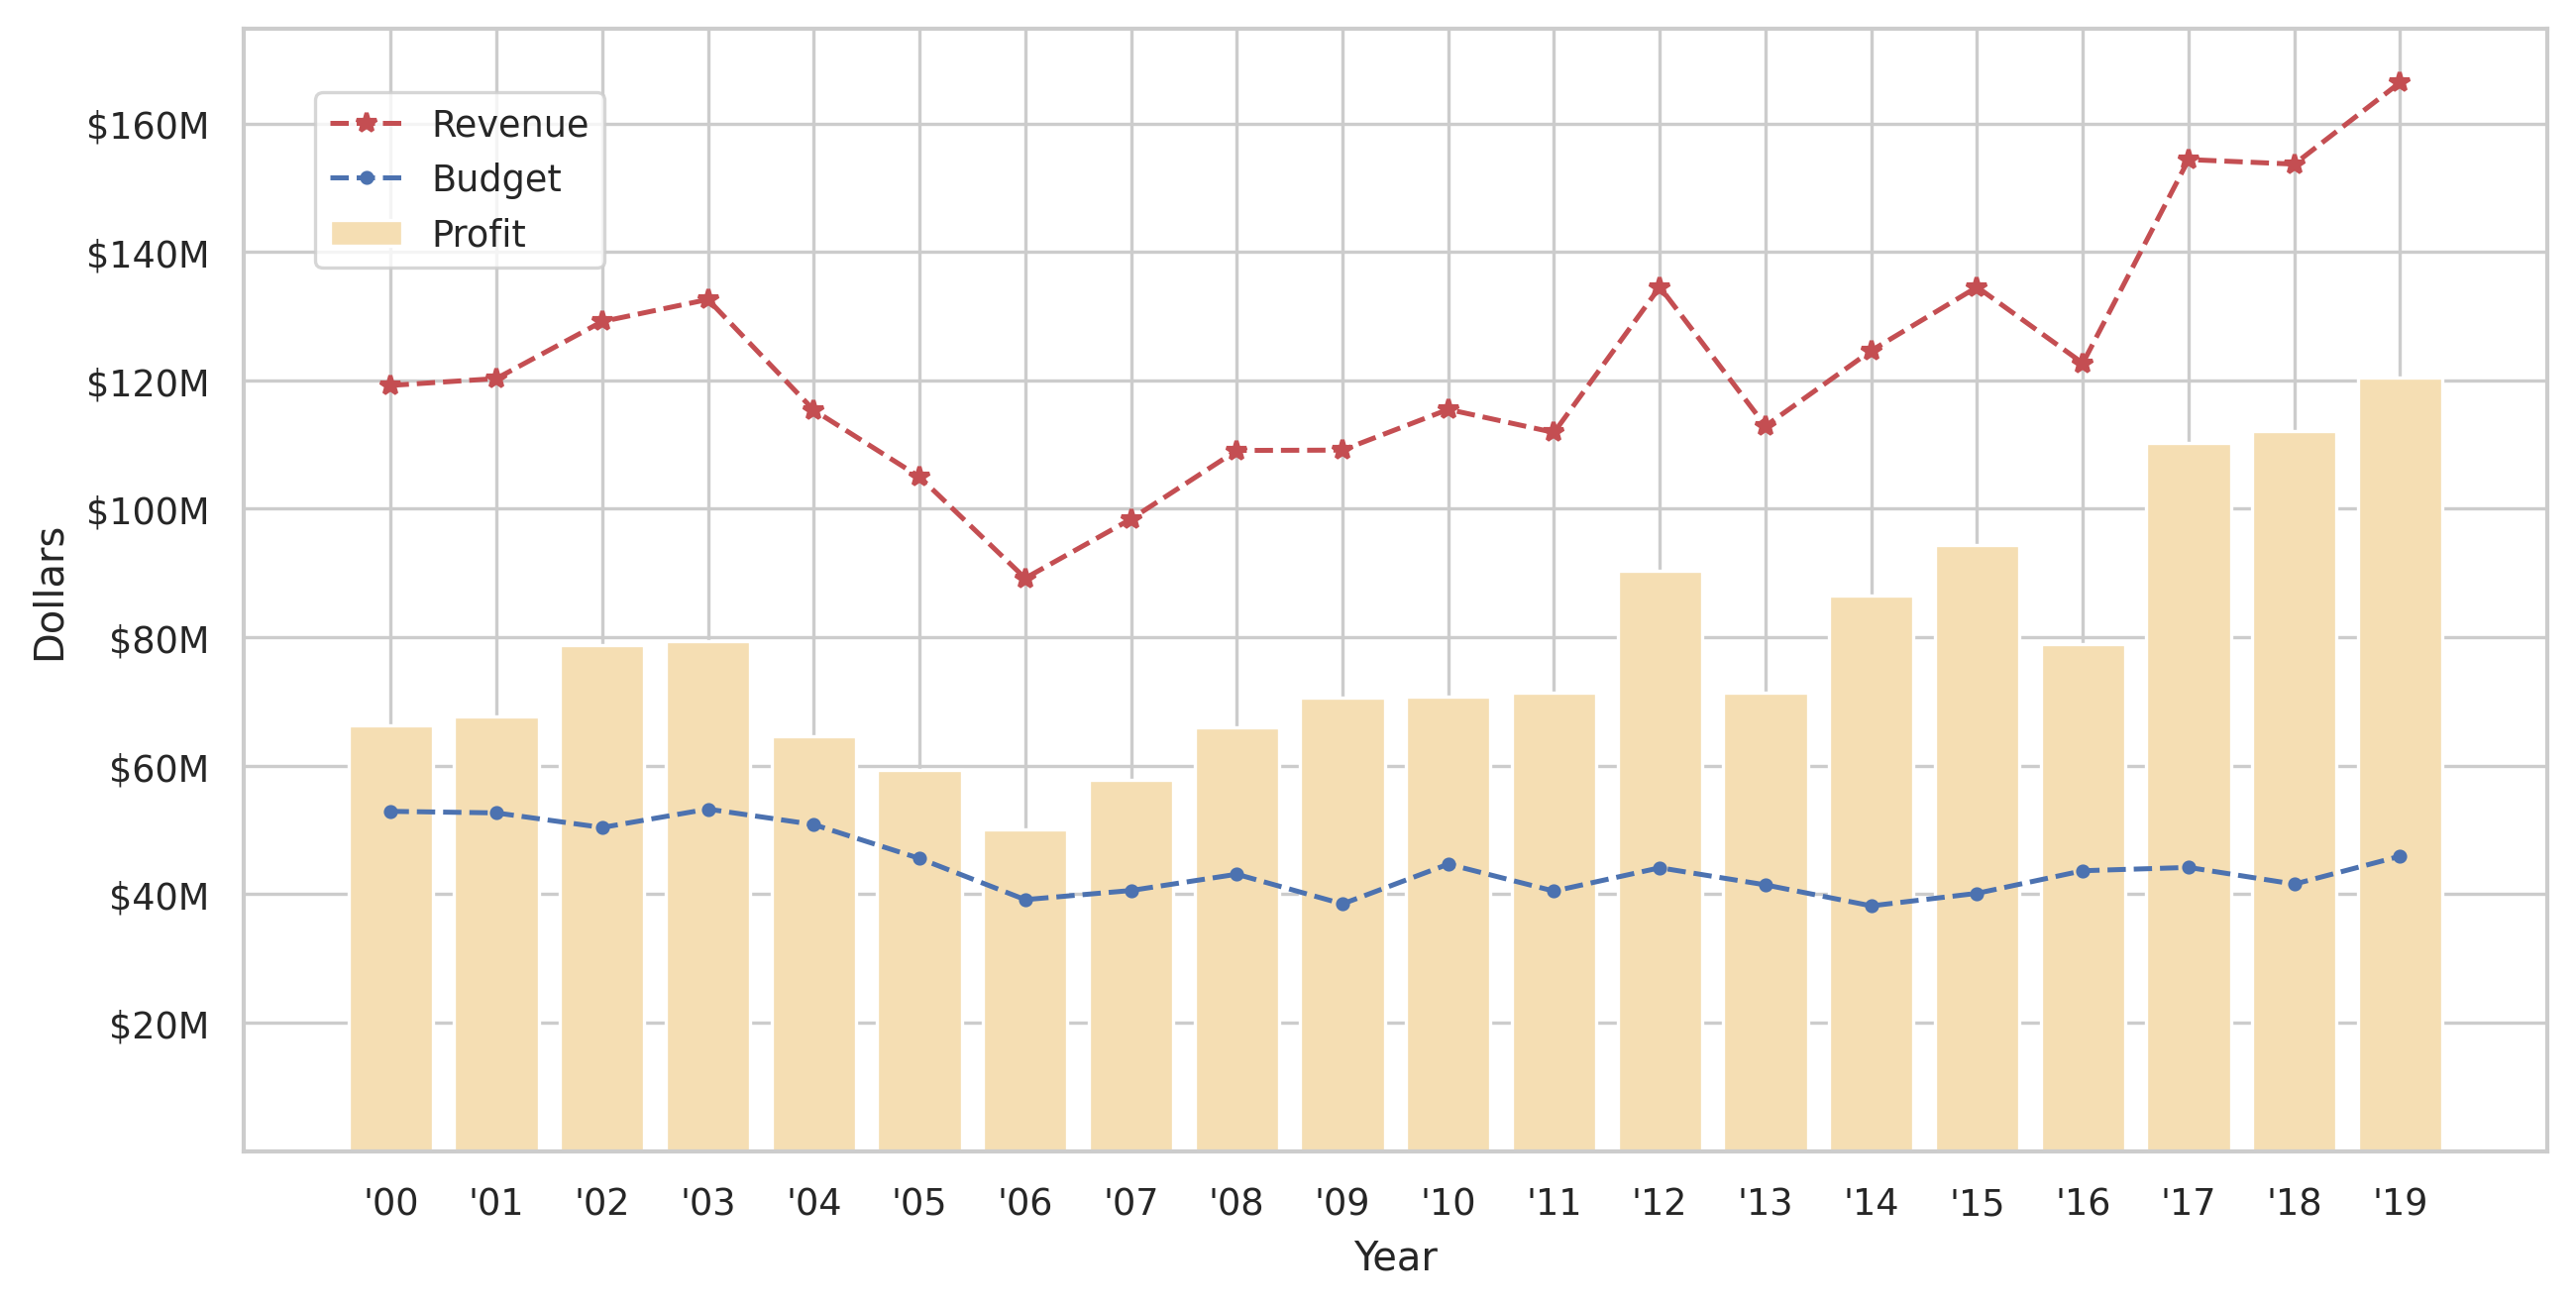

In [41]:
# with sns.axes_style("white"):
f, ax = plt.subplots(figsize=(10, 5), dpi=300)

# plt.bar(avg.index, avg.revenue_adj, color='cadetblue', width=-0.4, align='edge', label='Adjusted revenue')
ax.bar(avg.index, avg.profit, color='wheat', label='Profit')
# plt.plot(avg.index, avg.revenue_adj, color='lightsalmon', label='Adjusted revenue')

ax.set_xticks(ticks=years)
ax.set_xticklabels(year_labels)
ax.ticklabel_format(style='plain', useOffset=False, axis='y')
# ax.set_yticks(ticks=profit_values)
# ax.set_yticklabels(profit_labels)

# ax2 = ax.twinx()
ax.plot(avg.index, avg.revenue_adj, 'r--*', label='Revenue')
ax.plot(avg.index, avg.budget_adj, 'b--.', label='Budget')

ax.set_yticks(ticks=revenue_values)
ax.set_yticklabels(revenue_labels)

# ax.tick_params(axis='x', rotation=90)
# ax.set_xlabel('Genres')
# ax.set_ylabel('Number of movies (main dataset)')

# ax2.spines['right'].set_color('red')
# ax2.tick_params(axis='y', colors='red')
# ax2.set_ylabel('Number of movies (original IMDB dataset)', color='r')
# ax2.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()
f.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.1,0.83))

ax.set_xlabel('Year')
ax.set_ylabel('Dollars')

plt.savefig('profit.png')

plt.show()